In [16]:
import sys
import pandas
import matplotlib
import seaborn 
import sklearn

print(sys.version)
print(pandas.__version__)
print(matplotlib.__version__)
print(seaborn.__version__)
print(sklearn.__version__)

3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]
1.0.3
2.1.2
0.10.1
0.19.1


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 

In [18]:
#loading the required dataset
games=pandas.read_csv("games.csv")

In [19]:
#printing the name of the columns
print(games.columns)

#shape of the datframe
print(games.shape)


Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 20)


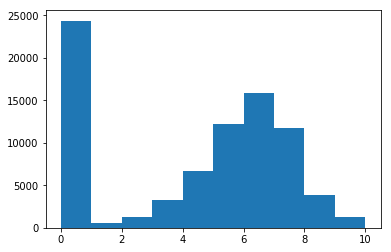

In [20]:
#making a histogram of all the ratings in avergae rating column
plt.hist(games["average_rating"])
plt.show()


In [21]:
#print the first row of all the games with zero rating
print(games[games["average_rating"]==0].iloc[0])

#greater than 0

print(games[games["average_rating"]>0].iloc[0])

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object
id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime          

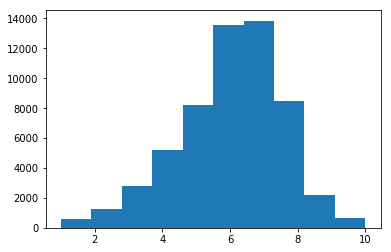

In [22]:
#removing rows without user reviews
games=games[games["users_rated"]>0]
#removing rows with  missing values
games=games.dropna(axis=0)

plt.hist(games["average_rating"])
plt.show()



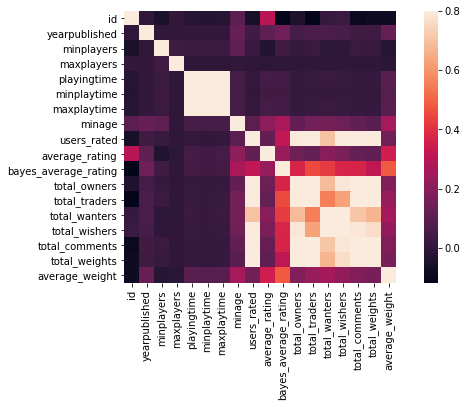

In [23]:
#correlation matrix

corrmat=games.corr()
figure=plt.figure(figsize=(10,5))

sns.heatmap(corrmat,vmax=0.8,square=True)
plt.show()

In [24]:
#get all the columns from the dataframe
columns=games.columns.tolist()
#filter the columns to remove the data we dont want
columns=[col for col in columns if col not in ["bayes_average_rating","average_rating","id","type","name"]]
#store the variable we will be predictiong on
target="average_rating"

In [25]:
#generating the training and test dataset
train=games.sample(frac=0.8,random_state=1)

test=games.loc[~games.index.isin(train.index)]

print(train.shape)
print(test.shape)

(45515, 20)
(11379, 20)


In [26]:
#import linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#initialise the mode class
LR=LinearRegression()

#fit the model into the training data

LR.fit(train[columns],train[target])




LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
#generate the predictions for the test data

predictions=LR.predict(test[columns])

#compute the error between our test predictions and actual values

mean_squared_error(predictions,test[target])


2.0788190326293243

In [33]:
#import the random forest model
from sklearn.ensemble import RandomForestRegressor

#intialise the model
RFR=RandomForestRegressor(n_estimators=100,min_samples_leaf=10,random_state=1)
#fit the data
RFR.fit(train[columns],train[target])


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [35]:
#make predictions
predictions=RFR.predict(test[columns])

#compute the error between our test predictions and our actual values

mean_squared_error(predictions,test[target])


1.4458564605687358

In [38]:
test[columns].iloc[0]

yearpublished      2011.0000
minplayers            2.0000
maxplayers            6.0000
playingtime         200.0000
minplaytime          60.0000
maxplaytime         200.0000
minage               14.0000
users_rated       15709.0000
total_owners      17611.0000
total_traders       273.0000
total_wanters      1108.0000
total_wishers      5581.0000
total_comments     3188.0000
total_weights      1486.0000
average_weight        3.6359
Name: 9, dtype: float64

In [40]:
#making predictions with both the models

rating_LR=LR.predict(test[columns].iloc[0].values.reshape(1,-1))
rating_RFR=RFR.predict(test[columns].iloc[0].values.reshape(1,-1))

print(rating_LR)
print(rating_RFR)

[8.12061283]
[7.91373581]


In [41]:
test[target].iloc[0]

8.07933